In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import spacy
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from collections import Counter
import re
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import mutual_info_classif

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

plt.style.use('ggplot')



In [2]:
nlp = spacy.load("en_core_web_sm")
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
df = pd.read_csv("C:/Users/USER/Desktop/IIT/MESS/Dataset/MBTI/mbti_1.csv")
df.sample(10)

,type,posts
4584,INTJ,'I have this happen to me a lot too. People I'...
5506,ENTP,"'Oddly enough, I have a near photographic memo..."
4153,INFP,"'Oh man, why do I always have to say so much a..."
273,INFP,'Completely and utterly upset. I thought I was...
3770,INTJ,yes thanks but I been testing for awhile I giv...
8594,INTP,'https://www.youtube.com/watch?v=lyieFu7BnHE w...
886,ISFP,'lol I saw another video where a girl put a kn...
6736,ESTP,'my boyfriend is a INTJ and he wont hug anyone...
7384,INFJ,'Always tied up... hate hair in my face|||Woe ...
169,INTJ,"'Apologize, acknowledge what went wrong, but m..."


In [4]:
print(f"The data set has {len(df)} rows and {len(df.columns)} columns")

The data set has 8675 rows and 2 columns


In [5]:
#Missing values and Data Type
pd.concat([(df.dtypes), (df.isnull().sum())], axis = 1,
                 keys = ["Data Type", "Number of missing values"])

,Data Type,Number of missing values
type,object,0
posts,object,0


In [6]:
#Count the post for each personality type
def count_post(df):
      df['type'].value_counts().plot(kind = 'bar',
                                     color = plt.cm.rainbow(np.linspace(0,1,16)))
      plt.xlabel("Personnality Types")
      plt.xticks(rotation = 45, ha = 'right')
      plt.ylabel("Number of posts")
      plt.title("Number of posts for each personality type")
      plt.show()

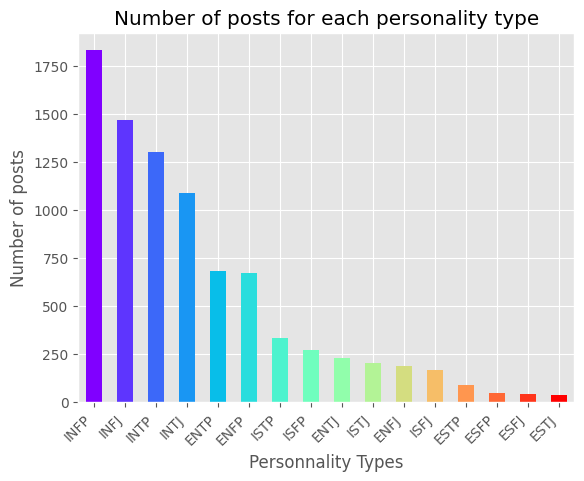

In [7]:
count_post(df)

In [8]:
def pie(df):
        df['type'].value_counts().plot(kind = 'pie', figsize = (12,12),
                                     autopct = '%1.1f%%',
                                     explode=[0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
        plt.title("Pie graph for MBTI types in the dataset")
        plt.show()


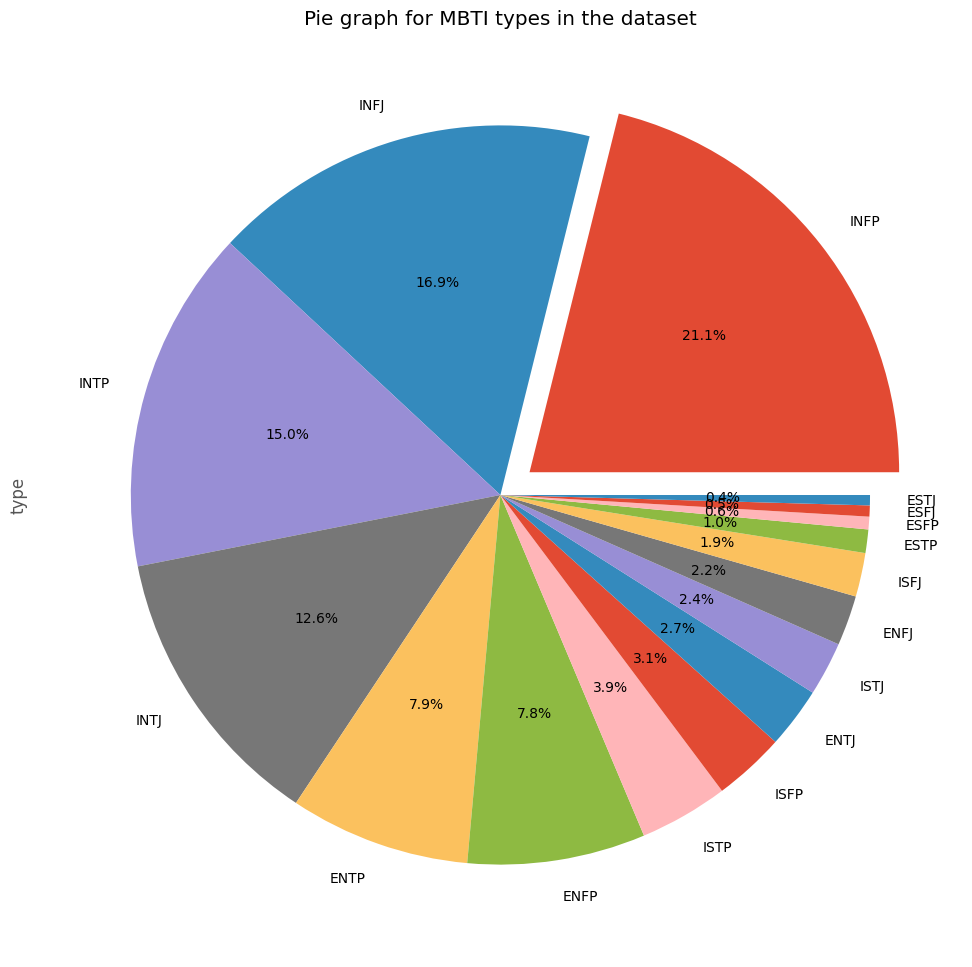

In [9]:
pie(df)

  - **There are 8675 rows and 2 columns in the dataset.**
  - **The columns are "type" and "posts".**
  - **There are 16 unique types in the dataset :** 
  
 1. ISTJ - Introverted, Sensing, Thinking, Judging
 2. ISFJ - Introverted, Sensing, Feeling, Judging
 3. INFJ - Introverted, Intuitive, Feeling, Judging
 4. INTJ - Introverted, Intuitive, Thinking, Judging
 5. ISTP - Introverted, Sensing, Thinking, Perceiving
 6. ISFP - Introverted, Sensing, Feeling, Perceiving
 7. INFP - Introverted, Intuitive, Feeling, Perceiving
 8. INTP - Introverted, Intuitive, Thinking, Perceiving
 9. ESTP - Extraverted, Sensing, Thinking, Perceiving
10. ESFP - Extraverted, Sensing, Feeling, Perceiving
11. ENFP - Extraverted, Intuitive, Feeling, Perceiving
12. ENTP - Extraverted, Intuitive, Thinking, Perceiving
13. ESTJ - Extraverted, Sensing, Thinking, Judging
14. ESFJ - Extraverted, Sensing, Feeling, Judging
15. ENFJ - Extraverted, Intuitive, Feeling, Judging
16. ENTJ - Extraverted, Intuitive, Thinking, Judging
  
  - **The posts are textual.**
  - **There are no null valuee and no repeated posts in the dataset.** 
  - **The most common type in the dataset in INFP (21.1% of the dataset)**
  
***However this distribution is quite different from the actual proportions of MBTI Types in the general population.
It would be necessary to resample the training data using the following methods :*** 

1. Undersampling : reducing the number of samples in the majority classes
2. Oversampling : Increasing the number of samples in the minority classes. 

Those resampling techniques will be weighted based on the most recent study on the actual distribution of MBTI types:

- ISFJ	(13.8%),
- ESFJ	(12.3%),
- ISTJ	(11.6%),
- ISFP	(8.8%),
- ESTJ	(8.7%),
- ESFP	(8.5%),
- ENFP	(8.1%),
- ISTP	(5.4%),
- INFP	(4.4%),
- ESTP	(4.3%),
- INTP	(3.3%),
- ENTP	(3.2%),
- ENFJ	(2.5%),
- INTJ	(2.1%),
- ENTJ	(1.8%),
- INFJ	(1.5%)


## Split to Train and Test set

In [10]:
    #80% train, 20% test
train, test = train_test_split(df, test_size = 0.2, 
                              random_state = 42)

In [11]:
print(f" Train set size : {train.shape}")
print(f" Test set size : {test.shape}")

 Train set size : (6940, 2)
 Test set size : (1735, 2)


# Features Engineering

**1. Post Length :** which consists on counting the words in each post (excluding the links). The purpose is to capture conciseness in writing styles.  

**2. Readability (Gunning Fox Index) :** to gauge the complexity of writing based on sentence length and word difficulty. 

**3. Named Entity Recognition (NER) :**  to capture differences in focus across personality types. 

**4. Sentiment Analysis (Polarity Scores) :** analyze the emotional tone of posts. 

**5. Vectorization :** convert text into numerical form using methods such as TF-IDF or word embeddings to represent word importance and meaning for machine learning models. 

## 1.Post Length

The post length is determined by the word counts. 



In [12]:
def word_counts(df):
    #Remove links
    def remove_links(text):
        return re.sub(r'http\S+|www\.\S+', '', text, flags = re.IGNORECASE)
    df['posts'] = df['posts'].apply(remove_links)
    
    df['word_counts'] = df['posts'].apply(lambda x : len(x.split()))
    return df

In [13]:
train = word_counts(train)
train.head()

,type,posts,word_counts
4080,INFJ,'I loved All the Light We Cannot See by Anthon...,1109
2614,ENFP,"'It depends. If I care about it, I fight and g...",1238
5414,ENTP,"'Welcome home, sonny :laughing:|||Just because...",707
1039,ENFP,That's really cool of you. I like it when anyo...,1534
8294,ENTP,'The duck is named Zeus.||| see traits of mamm...,976


In [14]:
#Average word counts
def average_words(df):
    index = list((df["type"].value_counts()).index)
    avg_post_length = df.groupby("type")["word_counts"].mean()
    avg_post_length = avg_post_length.loc[index]
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax.bar(avg_post_length.index, avg_post_length.values,
           color = sns.color_palette("plasma", 16))
    ax.set_xlabel('Type')
    plt.xticks(rotation = 45, ha = 'right')
    ax.set_ylabel('Word counts')
    ax.set_title('Average post length for each type')
    
    avg_post_length = avg_post_length.sort_values(ascending = False).reset_index()
    avg_post_length.columns = ['type', 'post_length']
    return plt, avg_post_length

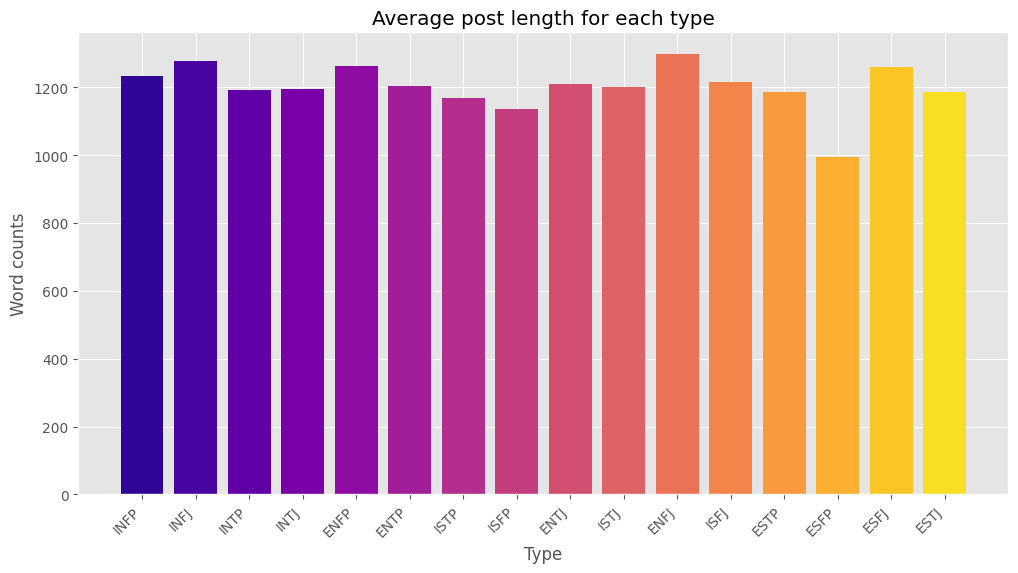

In [15]:
plt, avg_post_length = average_words(train)

In [16]:
print(avg_post_length)

    type  post_length
0   ENFJ  1296.738255
1   INFJ  1277.740271
2   ENFP  1261.967273
3   ESFJ  1258.971429
4   INFP  1232.702462
5   ISFJ  1213.966942
6   ENTJ  1208.080214
7   ENTP  1202.076364
8   ISTJ  1200.776398
9   INTJ  1194.267261
10  INTP  1190.781405
11  ESTP  1187.216216
12  ESTJ  1187.000000
13  ISTP  1167.685185
14  ISFP  1136.422018
15  ESFP   993.225000


**Conclusion:**

**Although the INFP is the most active type in the current dataset, the ENFJ type has, on average, the longest posts, despite having a lower overall number of posts.**


## 2.Readability : Gunning Fox Index

The readability feature is relevant because the personality traits can influence an individual's writing style, including the complexity of their language and sentence structure.


$$
GFI=0.4*(Average\ Sentence\ Length + Percentage\ of\ Long\ Words)
$$

#### 1.Average Sentence Length

$$
Average\ Sentence\ Length = \frac {Number\ of\ Words}{Number\ of\ Sentences}
$$

#### 2.Percentage of Long Words 

$$
Percentage\ of\ Long\ Words\ = (\frac {Long\ Words*}{Total\ Words\ Count})*100
$$


*We assume that a long word is any word having more that two syllables. 

In [17]:
def avg_sentence_length(df):
    def extract(text):
        doc = nlp(text)
        sentences = [sent.text for sent in doc.sents]
        sentences_count = len(sentences)
        return sentences_count
    df["sentence_count"] = df['posts'].apply(extract)
    df["avg_sentence_length"] = df["word_counts"]/df["sentence_count"]
    return df

In [18]:
train = avg_sentence_length(train)
train.head()

,type,posts,word_counts,sentence_count,avg_sentence_length
4080,INFJ,'I loved All the Light We Cannot See by Anthon...,1109,56,19.803571
2614,ENFP,"'It depends. If I care about it, I fight and g...",1238,74,16.729730
5414,ENTP,"'Welcome home, sonny :laughing:|||Just because...",707,46,15.369565
1039,ENFP,That's really cool of you. I like it when anyo...,1534,124,12.370968
8294,ENTP,'The duck is named Zeus.||| see traits of mamm...,976,46,21.217391


In [19]:
def perc_long_words(df) :
    
    #Count Syllables
    def syllable_count(word):
        word = word.lower()
        count = 0
        vowels = "aeiouy"
        #Check the first character
        if word[0] in vowels:
            count +=1
        for index in range(1,len(word)):
        
        #Prevent counting multiple consecutive vowels as separate syllables
            if word[index] in vowels and word[index-1] not in vowels:
                count +=1
        if word.endswith("es") or word.endswith("ed"):
            count-=1
        
        #Ensure it returns at least one syllable
        return max(1,count)
    
    
    #Count long words
    def count_long_words(post):
        long_word_count = 0
        for word in post.split():
            if syllable_count(word) >2:
                long_word_count += 1
        return long_word_count
    
    df['perc_longword'] = ((df['posts'].apply(count_long_words))/df['word_counts'])*100
    
    return df
        

In [20]:
train = perc_long_words(train)
train.head()

,type,posts,word_counts,sentence_count,avg_sentence_length,perc_longword
4080,INFJ,'I loved All the Light We Cannot See by Anthon...,1109,56,19.803571,13.976555
2614,ENFP,"'It depends. If I care about it, I fight and g...",1238,74,16.729730,10.985460
5414,ENTP,"'Welcome home, sonny :laughing:|||Just because...",707,46,15.369565,13.154173
1039,ENFP,That's really cool of you. I like it when anyo...,1534,124,12.370968,12.190352
8294,ENTP,'The duck is named Zeus.||| see traits of mamm...,976,46,21.217391,11.987705


In [21]:
train['gfi_score'] = 0.4*(train['avg_sentence_length']+train["perc_longword"])

    

In [22]:
def gfi_plot(df):
        gfi_avg = df.groupby('type')['gfi_score'].mean().reset_index()
        gfi_avg.columns =['type', 'GFI_scores']
        gfi_avg = gfi_avg.sort_values(by = 'GFI_scores', ascending = False)
        fig, ax =  plt.subplots(figsize = (12,6))
        ax.barh(gfi_avg['type'], gfi_avg['GFI_scores'],
                color = sns.color_palette("viridis", 16))
        ax.set_xlabel("Gunning Fox Index")
        ax.set_ylabel("MBTI Types")
        ax.set_title("Average Gunning Fox Index for each type")
        return (gfi_avg), (fig)

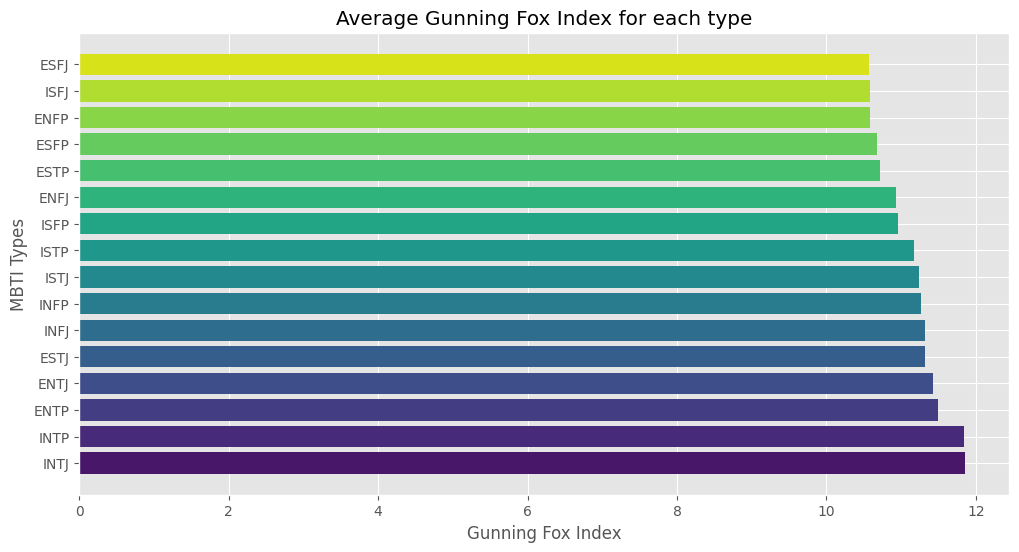

In [23]:
gfi_avg, fig = gfi_plot(train)


In [24]:
print(gfi_avg)

    type  GFI_scores
10  INTJ   11.854958
11  INTP   11.843967
3   ENTP   11.492286
2   ENTJ   11.425189
6   ESTJ   11.316739
8   INFJ   11.313906
9   INFP   11.267187
14  ISTJ   11.245160
15  ISTP   11.168842
13  ISFP   10.962083
0   ENFJ   10.934890
7   ESTP   10.717174
5   ESFP   10.678792
1   ENFP   10.589904
12  ISFJ   10.578801
4   ESFJ   10.564149


*Interpretation:*

- Index score 6 to 10 : easily readable
- Index score 10 to 12 : acceptable for a wide audience
- Index score 12 to 15 : more challenging, suitable for readers with some college education
- Index score 15 to 20 : Difficult to read, suitable for readers with college degrees
- Index score 20+ : Very complex, best understood by experts or readers with advanced degrees


**Conclusion:**

**The analysis of Gunning Fox Index (GFI) scores shows that the overall readability is "acceptable for a wide audience" (GFI 10-12), which is what we may expect from internet posts.**

**However the INTJ and INTP types have the highest average GFI scores (over 11.80), indicating their posts tend to be more challenging.**

## 3.Named Entity Recognition

This feature identfies and classifies entities in text such as names of people, organizations, locations and more, so that could help differentiate personality types based on the kinds of entities they mention. 

In [25]:
from collections import defaultdict 

In [26]:
def entity(df):
        def ner(text):
                doc = nlp(text)
                entities = defaultdict(list)
                for ent in doc.ents: 
                        entities[ent.label_].append(ent.text)        
                return dict(entities)
            
        df['named_entities_recognition'] = df['posts'].apply(ner)
        distinct_entities = set(entity for sublist in 
                               df['named_entities_recognition']
                               for entity in sublist)
        
        #Count encoding
        for entity in distinct_entities: 
            df[entity] = 0 #new columns corresponding to each entity, initialize to 0
        #Iterate over each row and count the number of element in each entity type
        for idx, row in df.iterrows():
            entity_dict = row['named_entities_recognition']
            for entity in distinct_entities: 
                if entity in entity_dict: 
                    df.at[idx, entity] = len(entity_dict[entity]) #update each column corresponding to entity counts to length of each entity dicitionary
                    
        return df
        
            

In [27]:
new_train = entity(train)

In [28]:
distinct_entities = list(set(entity for sublist 
                             in new_train['named_entities_recognition']
                             for entity in sublist))

In [29]:
def ner_count_viz(df):
    
        ner_counts = df[['type']+distinct_entities].groupby('type').sum() #total counts of each entity for each type
        ner_proportions = ner_counts.div(ner_counts.sum(axis=1), axis=0) 
        ner_proportions = ner_proportions.reset_index()
        
        plt.figure(figsize = (12,10))
        sns.heatmap(ner_proportions.set_index('type'), annot= True, cmap = 'YlGnBu', 
                   fmt = '.2f', cbar_kws = {'label': 'proportion'})
        plt.title('Named Entity Recognition Proportions by Type')
        plt.xlabel('Entity Types', fontsize = 12)
        plt.xticks(rotation = 45, ha = 'right')
        plt.ylabel('MBTI Types', fontsize = 12)
        plt.tight_layout()
        plt.show()
        
        highest_props = []
        for ent in distinct_entities: 
            highest_prop = ner_proportions.loc[ner_proportions[ent].idxmax(), ['type', ent]]        
            highest_props.append((ent, highest_prop['type'], highest_prop[ent]))
        highest_prop_df = pd.DataFrame(highest_props, columns = ['entity', 'type', 'max proportion'])
        
        return highest_prop_df, plt 
        

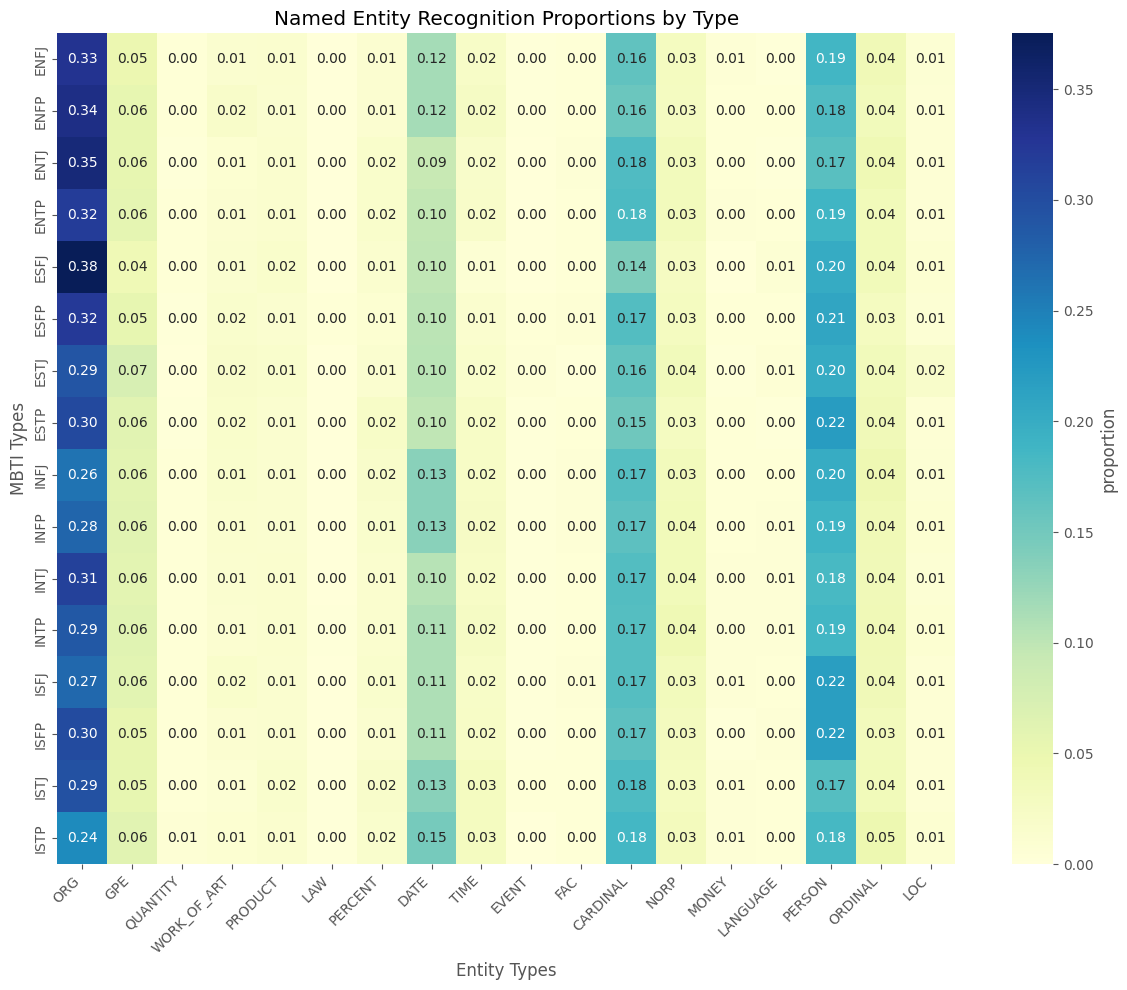

In [30]:
ner_proportion, plt = ner_count_viz(new_train)

In [31]:
print("Below are the MBTI types with the highest proportion for each entity based on their posts: ")
print(ner_proportion)

Below are the MBTI types with the highest proportion for each entity based on their posts: 
         entity  type  max proportion
0           ORG  ESFJ        0.375202
1           GPE  ESTJ        0.073419
2      QUANTITY  ISTP        0.006813
3   WORK_OF_ART  ENFP        0.019925
4       PRODUCT  ESFJ        0.016173
5           LAW  ESFP        0.003157
6       PERCENT  ESTP        0.020990
7          DATE  ISTP        0.147177
8          TIME  ISTJ        0.030279
9         EVENT  ESTJ        0.004759
10          FAC  ESFP        0.006944
11     CARDINAL  ISTP        0.184881
12         NORP  INTP        0.042767
13        MONEY  ISTP        0.005786
14     LANGUAGE  ESFJ        0.007547
15       PERSON  ESTP        0.219925
16      ORDINAL  ISTP        0.047877
17          LOC  ESTJ        0.018355


This table shows the maximum proportion of various entity types associated with specific MBTI personality types bases on their posts. 

Notably, the ESFJ type has the highest proportion of ORG entity (37.5%), indicating that the ESFJ type frequently discusses organizations in their posts compared to the other types. 
The ESTP type also showcases a strong association with PERSON entity (21.99%) compared to the other types, suggesting they often reference individuals. 


## 4.Sentiment Analysis

Sentiment Analysis can assess the emotional tone of a post, capturing whether the post is positive, negative or neutral, which can be informative in understanding how different MBTI type express emotions.

Preprocessing:
- Tokenization: Break the text into individual words or tokens.
- Stopwords removal: Remove common words that do not contribute much meaning, such as "and", "the", or "is".
- Lemmatization: Convert words to their base form (e.g., "running" → "run") to reduce redundancy and help the sentiment analysis tool process the text better.

The sentiment analysis tool used is VADER, thus the removal of the punctations is not mandatory in the preprocessing.

In [32]:
def preprocessing(text):
    
    if not isinstance(text, str): #Check if text is any datatype other than a string
        try:
            text = str(text) #attempt to convert text to string
        except:
            return "" #return empty string if conversion fails
        
    #tokenization 
    tokens = word_tokenize(text)

    #Remove stopwords NLTK but keep negation words
    mbti_stopwords = {'intp','intj','infp','infj',
                         'entp','entj','enfj','enfp',
                         'esfp','esfj','estp','estj',
                        'isfp','isfj','istp','istj',
                      
                     'INTP', 'INTJ','INFP', 'INFJ',
                     'ENTP','ENTJ','ENFJ','ENFP',
                     'ESFP','ESFJ','ESTP','ESTJ',
                      'ISFP','ISFJ','ISTP','ISTJ'}
    stop_words = set(stopwords.words('english')) - {'no', 'not', 'never'}
    mystop_words = mbti_stopwords.union(stop_words)
    tokens  =  [word for word in tokens if word not in mystop_words]

    #Lemmetization 
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
  
    #Join tokens 
    text_str = ' '.join(tokens)

    return text_str


In [33]:
new_train["preprocessed_text"] = new_train['posts'].apply(preprocessing)
new_train.head()

,type,posts,word_counts,sentence_count,avg_sentence_length,perc_longword,gfi_score,named_entities_recognition,ORG,GPE,...,EVENT,FAC,CARDINAL,NORP,MONEY,LANGUAGE,PERSON,ORDINAL,LOC,preprocessed_text
4080,INFJ,'I loved All the Light We Cannot See by Anthon...,1109,56,19.803571,13.976555,13.512051,"{'PERSON': ['Anthony Doerr', 'Birth Force Numb...",4,2,...,0,0,8,3,0,2,4,0,0,' I loved All Light We Can not See Anthony Doe...
2614,ENFP,"'It depends. If I care about it, I fight and g...",1238,74,16.729730,10.985460,11.086076,"{'PERSON': ['that?|||why?|||I', 'Btw', 'Ni', '...",13,9,...,0,1,4,5,0,0,6,3,1,"'It depends . If I care , I fight get really a..."
5414,ENTP,"'Welcome home, sonny :laughing:|||Just because...",707,46,15.369565,13.154173,11.409495,"{'PERSON': ['Dark', 'Gimp', 'Lego', 'Mad Max',...",4,0,...,0,0,4,0,1,0,6,3,0,"'Welcome home , sonny : laughing : |||Just str..."
1039,ENFP,That's really cool of you. I like it when anyo...,1534,124,12.370968,12.190352,9.824528,"{'PERSON': ['jinhong91', '|||Sorry', 'Audrey',...",21,2,...,0,0,2,6,0,0,7,1,0,That 's really cool . I like anyone anything h...
8294,ENTP,'The duck is named Zeus.||| see traits of mamm...,976,46,21.217391,11.987705,13.282038,{'CARDINAL': ['4h.uwex.edu/pubs/showdoc.cfm?do...,7,2,...,0,1,8,1,0,1,9,1,0,'The duck named Zeus.||| see trait mammalian p...


In [34]:
sentiments = SentimentIntensityAnalyzer()

def sentiment_score(df):
    df['Positive'] = [sentiments.polarity_scores(i)['pos']
                     for i in df['preprocessed_text']]
    
    df['Negative'] = [sentiments.polarity_scores(i)['neg'] 
                     for i in df['preprocessed_text']]
    
    df['Neutral'] = [sentiments.polarity_scores(i)['neu']
                    for i in df['preprocessed_text']]
    
    return df



In [35]:
new_train  = sentiment_score(train)
new_train.head()

,type,posts,word_counts,sentence_count,avg_sentence_length,perc_longword,gfi_score,named_entities_recognition,ORG,GPE,...,NORP,MONEY,LANGUAGE,PERSON,ORDINAL,LOC,preprocessed_text,Positive,Negative,Neutral
4080,INFJ,'I loved All the Light We Cannot See by Anthon...,1109,56,19.803571,13.976555,13.512051,"{'PERSON': ['Anthony Doerr', 'Birth Force Numb...",4,2,...,3,0,2,4,0,0,' I loved All Light We Can not See Anthony Doe...,0.238,0.099,0.663
2614,ENFP,"'It depends. If I care about it, I fight and g...",1238,74,16.729730,10.985460,11.086076,"{'PERSON': ['that?|||why?|||I', 'Btw', 'Ni', '...",13,9,...,5,0,0,6,3,1,"'It depends . If I care , I fight get really a...",0.289,0.088,0.623
5414,ENTP,"'Welcome home, sonny :laughing:|||Just because...",707,46,15.369565,13.154173,11.409495,"{'PERSON': ['Dark', 'Gimp', 'Lego', 'Mad Max',...",4,0,...,0,1,0,6,3,0,"'Welcome home , sonny : laughing : |||Just str...",0.265,0.108,0.628
1039,ENFP,That's really cool of you. I like it when anyo...,1534,124,12.370968,12.190352,9.824528,"{'PERSON': ['jinhong91', '|||Sorry', 'Audrey',...",21,2,...,6,0,0,7,1,0,That 's really cool . I like anyone anything h...,0.218,0.136,0.646
8294,ENTP,'The duck is named Zeus.||| see traits of mamm...,976,46,21.217391,11.987705,13.282038,{'CARDINAL': ['4h.uwex.edu/pubs/showdoc.cfm?do...,7,2,...,1,0,1,9,1,0,'The duck named Zeus.||| see trait mammalian p...,0.214,0.059,0.727


In [36]:
new_train['polarity'] = (new_train['Positive']-new_train['Negative'])/((new_train['Positive']+new_train['Negative'])+0.001)

In [37]:
print(f"Cols with NaN values: {new_train.columns[new_train.isna().any()].tolist()}")

Cols with NaN values: []


In [38]:
def polarity_viz(df):
         
        #Group by Type
        polarity_by_type = df.groupby('type').agg({"Positive":"mean",
                                                  "Negative":"mean"}).reset_index()
        polarity_by_type.columns = ['type', 'POS', 'NEG']                                 
        polarity_by_type['polarity'] = (polarity_by_type['POS']-polarity_by_type['NEG'])/(polarity_by_type['POS']+polarity_by_type['NEG'])+0.00001
        polarity_by_type  = polarity_by_type.sort_values(by='polarity', ascending = False).reset_index(drop = True)
        
        #Heatmap
        pivot_table = polarity_by_type.pivot_table(values = 'polarity',
                                                   index = ['type'],
                                                   aggfunc = 'first')
        pivot_table = pivot_table.reindex(polarity_by_type['type'])
        plt.figure(figsize = (12, 16*0.5))
        sns.heatmap(pivot_table, cmap = 'RdYlGn', annot = True, fmt = '.2f')
        plt.title('Polarity Scores by Type')
        plt.ylabel('Type', fontsize = 14)
        plt.yticks(fontsize = 12)
        plt.xticks(fontsize = 14)
        plt.tight_layout()
        plt.show()
        
        return polarity_by_type, plt
    

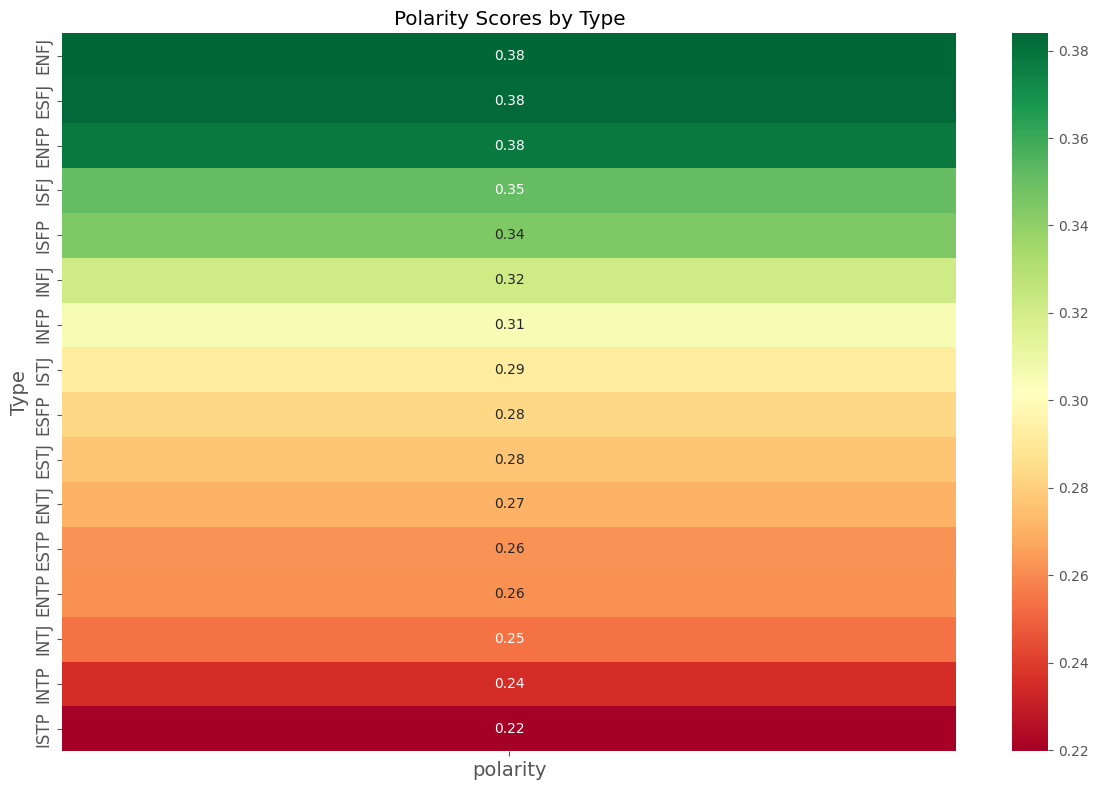

In [39]:
polarity_by_type, polarity_plot = polarity_viz(new_train)


In [40]:
print(polarity_by_type)

    type       POS       NEG  polarity
0   ENFJ  0.256034  0.113973  0.383950
1   ESFJ  0.240286  0.107171  0.383120
2   ENFP  0.248665  0.112333  0.377665
3   ISFJ  0.232942  0.111950  0.350820
4   ISFP  0.232917  0.113546  0.344553
5   INFJ  0.226655  0.116448  0.321218
6   INFP  0.227425  0.121050  0.305270
7   ISTJ  0.208025  0.114037  0.291841
8   ESFP  0.213775  0.119550  0.282692
9   ESTJ  0.207562  0.117625  0.276581
10  ENTJ  0.208540  0.119679  0.270747
11  ESTP  0.210986  0.123324  0.262228
12  ENTP  0.208962  0.122291  0.261656
13  INTJ  0.202854  0.120648  0.254123
14  INTP  0.197180  0.121972  0.235658
15  ISTP  0.197893  0.126600  0.219715


*Interpretation :* 

The polarity score in our analysis ranges from -1 to +1, providing a nuanced measure of sentiment in the posts. This scale offers a clear and intuitive way to understand the overall emotional tone of the content:

    - A score closer to -1 indicates a predominantly negative sentiment. In these cases, the expression of negative emotions, criticisms, or unfavorable views outweighs positive elements in the text.
    - Conversely, a score approaching +1 signifies a largely positive sentiment. Such posts are characterized by an abundance of upbeat language, approval, or optimistic perspectives.


**Conclusion : Our analysis reveals a generally Positive sentiment across all post types, indicating an optimistic discourse overall.**

**Interestingly, the INTP and INTJ with the highest Gunning Fox Index scores (readability score) indicating the most complex language use, are among the type with the lowest polarity scores. This finding highlights the intricate relationship between language sophistication and sentiment expression.**

**Additionally, we observe that the F(Feelers) generally express more positive sentiment compared to T (Thinker) types.**

In [41]:
new_train.head()

,type,posts,word_counts,sentence_count,avg_sentence_length,perc_longword,gfi_score,named_entities_recognition,ORG,GPE,...,MONEY,LANGUAGE,PERSON,ORDINAL,LOC,preprocessed_text,Positive,Negative,Neutral,polarity
4080,INFJ,'I loved All the Light We Cannot See by Anthon...,1109,56,19.803571,13.976555,13.512051,"{'PERSON': ['Anthony Doerr', 'Birth Force Numb...",4,2,...,0,2,4,0,0,' I loved All Light We Can not See Anthony Doe...,0.238,0.099,0.663,0.411243
2614,ENFP,"'It depends. If I care about it, I fight and g...",1238,74,16.729730,10.985460,11.086076,"{'PERSON': ['that?|||why?|||I', 'Btw', 'Ni', '...",13,9,...,0,0,6,3,1,"'It depends . If I care , I fight get really a...",0.289,0.088,0.623,0.531746
5414,ENTP,"'Welcome home, sonny :laughing:|||Just because...",707,46,15.369565,13.154173,11.409495,"{'PERSON': ['Dark', 'Gimp', 'Lego', 'Mad Max',...",4,0,...,1,0,6,3,0,"'Welcome home , sonny : laughing : |||Just str...",0.265,0.108,0.628,0.419786
1039,ENFP,That's really cool of you. I like it when anyo...,1534,124,12.370968,12.190352,9.824528,"{'PERSON': ['jinhong91', '|||Sorry', 'Audrey',...",21,2,...,0,0,7,1,0,That 's really cool . I like anyone anything h...,0.218,0.136,0.646,0.230986
8294,ENTP,'The duck is named Zeus.||| see traits of mamm...,976,46,21.217391,11.987705,13.282038,{'CARDINAL': ['4h.uwex.edu/pubs/showdoc.cfm?do...,7,2,...,0,1,9,1,0,'The duck named Zeus.||| see trait mammalian p...,0.214,0.059,0.727,0.565693


In [42]:
#Drop highly correlated columns
new_train = new_train.drop(columns = ['posts', 'named_entities_recognition', 
                                      'Positive', 'Negative', 'Neutral', 
                                      'perc_longword', 'avg_sentence_length', 'sentence_count'], 
                           axis = 1)

In [43]:
new_train.head()

,type,word_counts,gfi_score,ORG,GPE,QUANTITY,WORK_OF_ART,PRODUCT,LAW,PERCENT,...,FAC,CARDINAL,NORP,MONEY,LANGUAGE,PERSON,ORDINAL,LOC,preprocessed_text,polarity
4080,INFJ,1109,13.512051,4,2,1,1,0,0,0,...,0,8,3,0,2,4,0,0,' I loved All Light We Can not See Anthony Doe...,0.411243
2614,ENFP,1238,11.086076,13,9,0,0,0,0,0,...,1,4,5,0,0,6,3,1,"'It depends . If I care , I fight get really a...",0.531746
5414,ENTP,707,11.409495,4,0,0,0,1,0,0,...,0,4,0,1,0,6,3,0,"'Welcome home , sonny : laughing : |||Just str...",0.419786
1039,ENFP,1534,9.824528,21,2,0,0,1,0,0,...,0,2,6,0,0,7,1,0,That 's really cool . I like anyone anything h...,0.230986
8294,ENTP,976,13.282038,7,2,0,1,1,0,0,...,1,8,1,0,1,9,1,0,'The duck named Zeus.||| see trait mammalian p...,0.565693


## Vectorization and Dimensionality Reduction

Convert textual data into numerical form for machine learning algorithm to process. The vectors are the representation of the word occurences and relationships.

Approach:
- TF-IDF (Term Frequency-Inverse Document Frequency): A popular vectorization technique that captures how important a word is to a document relative to the entire dataset. TF-IDF can reduce the impact of common words that appear in many posts and emphasize more unique or distinctive words.
- Word Embeddings: More advanced techniques, such as Word2Vec or BERT, can capture the semantic meaning of words by representing each word in a multi-dimensional space where similar words are closer together.


In [44]:
vectorizer = TfidfVectorizer(max_features = 1000, 
                            max_df = 0.8,
                            min_df = 0.1)

svd = TruncatedSVD(n_components = 800)

def convert_text_train(df, vectorizer, svd):
    
    #Vectorization
    text = df['preprocessed_text']
    text_vectorized = vectorizer.fit_transform(text)
    
    #Dimensionality Reduction
    text_svd = svd.fit_transform(text_vectorized)

    #Convert to df
    text_df = pd.DataFrame(text_svd,
                            columns = [f'svd_feature_{i}'
                                       for i in range(text_svd.shape[1])],
                            index = text.index)
    
    #Drop remained text columns
    df = df.drop(columns = ['preprocessed_text'])

    
    df = pd.concat([df,text_df], axis = 1)
    
    return df

In [45]:
train1 = convert_text_train(new_train, vectorizer, svd)


In [46]:
train1.head()

,type,word_counts,gfi_score,ORG,GPE,QUANTITY,WORK_OF_ART,PRODUCT,LAW,PERCENT,...,svd_feature_790,svd_feature_791,svd_feature_792,svd_feature_793,svd_feature_794,svd_feature_795,svd_feature_796,svd_feature_797,svd_feature_798,svd_feature_799
4080,INFJ,1109,13.512051,4,2,1,1,0,0,0,...,-0.020210,0.017769,-0.043385,0.002899,-0.015419,0.011011,0.023256,-0.008032,0.033718,-0.036799
2614,ENFP,1238,11.086076,13,9,0,0,0,0,0,...,0.005539,0.008660,-0.014397,0.032628,0.014590,-0.025234,-0.004792,0.016735,-0.006589,-0.009703
5414,ENTP,707,11.409495,4,0,0,0,1,0,0,...,0.007045,-0.030478,0.045185,-0.009424,0.025963,0.009365,-0.017736,0.002165,-0.027721,0.011670
1039,ENFP,1534,9.824528,21,2,0,0,1,0,0,...,0.000562,-0.042892,0.001929,0.008547,0.023474,0.015872,0.018384,0.004547,0.017363,-0.025473
8294,ENTP,976,13.282038,7,2,0,1,1,0,0,...,0.029025,-0.023849,0.005120,0.004373,0.000269,-0.007710,-0.043962,0.007644,0.012375,-0.000225


In [47]:
print(f"Cols with NaN values: {train1.columns[train1.isna().any()].tolist()}")

Cols with NaN values: []


### Resampling

The resampling method will be chosen based on the proportion of each type in the dataset relative to the actual distribution. 

The actual distribution of types is as follow :  

- ISFJ	(13.8%),
- ESFJ	(12.3%),
- ISTJ	(11.6%),
- ISFP	(8.8%),
- ESTJ	(8.7%),
- ESFP	(8.5%),
- ENFP	(8.1%),
- ISTP	(5.4%),
- INFP	(4.4%),
- ESTP	(4.3%),
- INTP	(3.3%),
- ENTP	(3.2%),
- ENFJ	(2.5%),
- INTJ	(2.1%),
- ENTJ	(1.8%),
- INFJ	(1.5%)

If a type is overrepresented in the dataset compared to its actual proportion, undersampling method will be applied. 

If a type is underrepresented, oversampling will be applied to balance it. 

In [48]:
def resample(train):
    
    X = train.drop(columns = ['type'], axis = 1)
    y = train['type']
    
    #Actual distrubution of each type 
    MBTI_dict= {"ISFJ":0.138,"ESFJ":0.123,
                "ISTJ":0.116, "ISFP":0.088,
                "ESTJ":0.087, "ESFP":0.085,
                "ENFP":0.081, "ISTP":0.054,
                "INFP":0.044, "ESTP":0.043,
                "INTP":0.033, "ENTP":0.032,
                "ENFJ":0.025, "INTJ":0.021,
                "ENTJ":0.018, "INFJ":0.015}
    
    #Calculate the desired number of samples for each class 
    original_class_counts = Counter(y)
    total_samples = sum(original_class_counts.values())
    desired_samples = {mbti_type: int(weight*total_samples)
                      for mbti_type, weight in MBTI_dict.items()}
    
    over_sampling = {}
    under_sampling = {}
    
    for mbti_type, desired_count in desired_samples.items():
        if desired_count > original_class_counts[mbti_type]:
            over_sampling[mbti_type] = desired_count
        else:
            under_sampling[mbti_type] = desired_count
    
    over = SMOTE(sampling_strategy =over_sampling ,
                  random_state = 42)
    under = RandomUnderSampler(sampling_strategy=under_sampling,
                               random_state = 42)
    
    pipeline = Pipeline([('over', over),('under',under)])
    
    X_resampled, y_resampled = pipeline.fit_resample(X,y)
    
    train_resampled = pd.concat([X_resampled, y_resampled], axis = 1)
    
    return train_resampled

In [49]:
train_resampled = resample(train1)

In [50]:
train_resampled.head()

,word_counts,gfi_score,ORG,GPE,QUANTITY,WORK_OF_ART,PRODUCT,LAW,PERCENT,DATE,...,svd_feature_791,svd_feature_792,svd_feature_793,svd_feature_794,svd_feature_795,svd_feature_796,svd_feature_797,svd_feature_798,svd_feature_799,type
0,1477,13.098185,19,5,0,1,1,0,5,8,...,0.005089,-0.000630,-0.020121,0.000777,-0.028628,-0.007313,-0.019907,-0.000382,-0.022755,ENFJ
1,926,8.990840,9,2,0,0,1,0,0,2,...,0.012650,-0.000492,0.015748,-0.029593,-0.049335,-0.011386,0.006906,0.011042,-0.028907,ENFJ
2,1354,13.782944,8,4,0,2,0,0,0,9,...,0.000349,0.018691,-0.012286,-0.001500,-0.007749,0.039201,0.015209,-0.033268,0.018159,ENFJ
3,1560,9.221078,15,2,0,0,1,0,1,18,...,-0.002190,0.021336,-0.021892,0.001293,-0.006913,-0.001361,-0.018481,0.033223,0.001817,ENFJ
4,1523,9.709735,13,2,0,1,0,0,0,6,...,0.000610,-0.002325,-0.010709,0.015610,0.012869,0.001108,-0.006547,0.015396,-0.010943,ENFJ


In [51]:
X_train_resampled = train_resampled.drop(columns = ['type'])
y_train_resampled = train_resampled['type']

In [52]:
def pie_distribution(Y,title):
    y_dict = Counter(Y)
    types = list(y_dict.keys())
    sizes = list(y_dict.values())
    
    total = sum(sizes)
    percentages = [f'{(s/total)*100:.1f}%'
                   for s in sizes]
    
    fig, ax = plt.subplots(figsize = (10,8))
    ax.pie(sizes, labels = types,
           autopct = '%1.1f%%')
    ax.set_title(title)
    plt.axis('equal')
    plt.show()

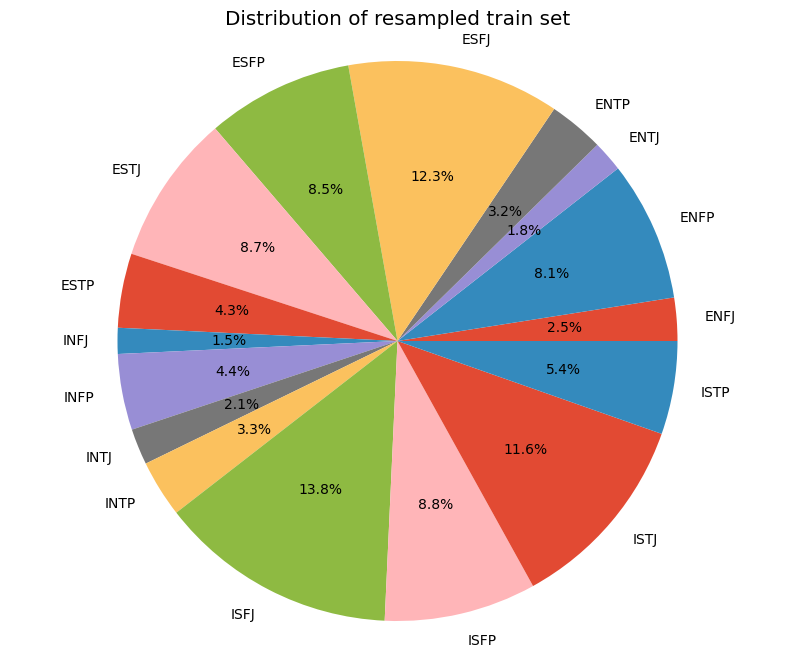

In [53]:
pie_distribution(y_train_resampled, title = 'Distribution of resampled train set')

**The distribution now matches with the general population type. By intentionally altered the distribution of the training data, we are able to address the class imbalance issues.**

**The test set, however, remains untouched to represent the initial distribution.**

### 4 Classifiers across MBTI axis

The MBTI personality types are defined by four dimensions : 
- Extraversion (E) and Introversion (I)
- Sensing (S) and INtuition (N) 
- Thinking (T) and Feeling (F) 
- Perceiving (P) and Judging (J)

Rather than creating a model to classify all 16 MBTI personality types, we will instead build four separate classifiers, each focused on one of these dimensions. 

By breaking down the MBTI types into four binary classifications, we can reduce the complexity of the classification task by focusing on a single binary choice instead of the 16 classes. 
Additionnally, this method allows us to apply different models or techniques to each dimension if needed and finetune the classifiers separately.  

We will encode the classes in each dimension as 1 and 0 and split the 'type' column to 4 columns representing each dimension. 

In [54]:
def get_types(row):
    t = row['type']
    
    I=0; N=0; T=0; J=0
    
    #I VS E
    if t[0]=='I': I=1
    elif t[0]=='E':I=0
    else : print('I-E not found')
        
    #N VS S
    if t[1]=='N': N=1
    elif t[1]=='S': N=0
    else : print('N-S not found')
        
    #T VS F   
    if t[2]=='T': T=1
    elif t[2]=='F': T=0
    else: print('T-F not found')
        
    #J VS P 
    if t[3]=='J' : J=1
    elif t[3]=='P': J=0
    else : print('J-P not found')
        
    return pd.Series ({'IE': I,
                      'NS' : N,
                      'TF' : T,
                      'JP' : J})



In [55]:
y_train_splitted = pd.DataFrame(y_train_resampled)

In [56]:
y_train_splitted = y_train_splitted.join(y_train_splitted.apply(lambda row : get_types(row),
                                                               axis  = 1))

In [57]:
y_train_splitted.sample(10)

,type,IE,NS,TF,JP
1739,ESFJ,0,0,0,1
6378,ISTJ,1,0,1,1
1598,ESFJ,0,0,0,1
5485,ISFP,1,0,0,0
1659,ESFJ,0,0,0,1
4164,INTP,1,1,1,0
4843,ISFJ,1,0,0,1
1707,ESFJ,0,0,0,1
4372,ISFJ,1,0,0,1
1808,ESFJ,0,0,0,1


The target variable is transformed into four binary classifiers, each representing one dimension of the MBTI personality type :  

    -'IE'= 1, class= I(Introvert) VS 'IE'= 0, class= E(Extrovert)
    -'NS'= 1, class= N (Intuitive) VS 'NS'= 0, class = S (Sensing)
    -'TF'= 1, class= T (Thinking) VS 'TF'= 0, class = F (Feeling)
    -'JP'= 1, class = J (Judging) VS 'JP'= 0, class = P (Perceiving) 

### Scale X 

The features will be scaled for standardization purpose to ensure they contribute equallu to the model's performance. 

In [58]:
X_train_resampled.head()

,word_counts,gfi_score,ORG,GPE,QUANTITY,WORK_OF_ART,PRODUCT,LAW,PERCENT,DATE,...,svd_feature_790,svd_feature_791,svd_feature_792,svd_feature_793,svd_feature_794,svd_feature_795,svd_feature_796,svd_feature_797,svd_feature_798,svd_feature_799
0,1477,13.098185,19,5,0,1,1,0,5,8,...,0.009221,0.005089,-0.000630,-0.020121,0.000777,-0.028628,-0.007313,-0.019907,-0.000382,-0.022755
1,926,8.990840,9,2,0,0,1,0,0,2,...,0.019004,0.012650,-0.000492,0.015748,-0.029593,-0.049335,-0.011386,0.006906,0.011042,-0.028907
2,1354,13.782944,8,4,0,2,0,0,0,9,...,0.020195,0.000349,0.018691,-0.012286,-0.001500,-0.007749,0.039201,0.015209,-0.033268,0.018159
3,1560,9.221078,15,2,0,0,1,0,1,18,...,0.019501,-0.002190,0.021336,-0.021892,0.001293,-0.006913,-0.001361,-0.018481,0.033223,0.001817
4,1523,9.709735,13,2,0,1,0,0,0,6,...,-0.030598,0.000610,-0.002325,-0.010709,0.015610,0.012869,0.001108,-0.006547,0.015396,-0.010943


In [59]:
len(X_train_resampled.columns)

821

In [60]:
scaler = StandardScaler()

In [61]:
X_train_scaled = scaler.fit_transform(X_train_resampled)

## Training

**Logistic Regression, KNeighbors classifier and RandomForest classifier** have been selected and a grid search with various parameters will be conducted to identity the best-performing model for each classification task.

The grid search will be applied accross the four MBTI dimensions, and for each model, it will yield the hyperparameters that achieve the highest cross-validation score. 

In [62]:
#Define a function to perform GridSearch 
def gridsearch(model, param_grid, X, y, dimension):
    gridsearch = GridSearchCV(model, param_grid, cv = 5,
                             scoring = 'accuracy', n_jobs = -1) #Use alll available CPU cores
    gridsearch.fit(X,y)
    
    print(f"Best parameters for {type(model).__name__}: {gridsearch.best_params_}")
    print(f"Best cross-validation score: {gridsearch.best_score_:.3f}")
    return gridsearch.best_estimator_, gridsearch.best_score_

In [63]:

#Logistic Regression 
lr_param = {'solver' : ['lbfgs','liblinear'],
           'max_iter': [100,500,1000],
           'C' : [0.001, 0.01, 0.1, 1, 10, 100]}

#KNeighbors Classifier
KNN_param = {'n_neighbors': [3,5,7,9],
            'weights': ['uniform', 'distance'],
            'metric':['euclidean', 'manhattan']}


#RandomForest Classifier
forest_param = {'n_estimators':[100,200], 
               'max_depth':[None, 10,20], 
               'min_samples_split':[2,5],
               'min_samples_leaf':[1,2]} 




In [64]:
dimensions = ['IE', 'NS', 'TF', 'JP']

#Dictionary to store best models for each dimension 
best_models = {dim:{} for dim in dimensions}

for dimension in dimensions : 
    print(f"\nPerforming GridSearch for dimension : {dimension}")
    
    #Logistic Regression
    best_models[dimension]['LogisticRegression'] = gridsearch(LogisticRegression(),
                                                            lr_param,
                                                            X_train_scaled, y_train_splitted[dimension],
                                                            dimension)
    
    #KNeighbors Classifier
    best_models[dimension]['KNeighborsClassifier'] = gridsearch(KNeighborsClassifier(),
                                                   KNN_param,
                                                   X_train_scaled, y_train_splitted[dimension],
                                                   dimension)
    
    #RandomForest Classifier
    best_models[dimension]['RandomForestClassifier'] = gridsearch(RandomForestClassifier(),
                                                                 forest_param,
                                                                 X_train_scaled, y_train_splitted[dimension],
                                                                 dimension)
    
   
    


Performing GridSearch for dimension : IE
Best parameters for LogisticRegression: {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}
Best cross-validation score: 0.802
Best parameters for KNeighborsClassifier: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.828
Best parameters for RandomForestClassifier: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.800

Performing GridSearch for dimension : NS
Best parameters for LogisticRegression: {'C': 0.001, 'max_iter': 100, 'solver': 'lbfgs'}
Best cross-validation score: 0.753
Best parameters for KNeighborsClassifier: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.734
Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.815

Performing GridSearch for dimension : TF
Best parame

In [65]:
def score_viz(best_models):
    dimensions = ['IE','NS','TF','JP']
    models = ['LogisticRegression', 
                'KNeighborsClassifier',
              'RandomForestClassifier']
    
    plt.figure(figsize = (12,6))
    bottom = np.zeros(len(models))
    for dim in dimensions : 
        scores = [best_models[dim][model][1]
                 for model in models]
        plt.bar(models, scores, bottom = bottom, label = dim)
        bottom += scores
        
    plt.xlabel('Models')
    plt.ylabel('Cumulative Accuracy Score')
    plt.title('Cumulative Model Performance Across Dimension')
    plt.legend(title = 'Dimensions')
    
    plt.show()

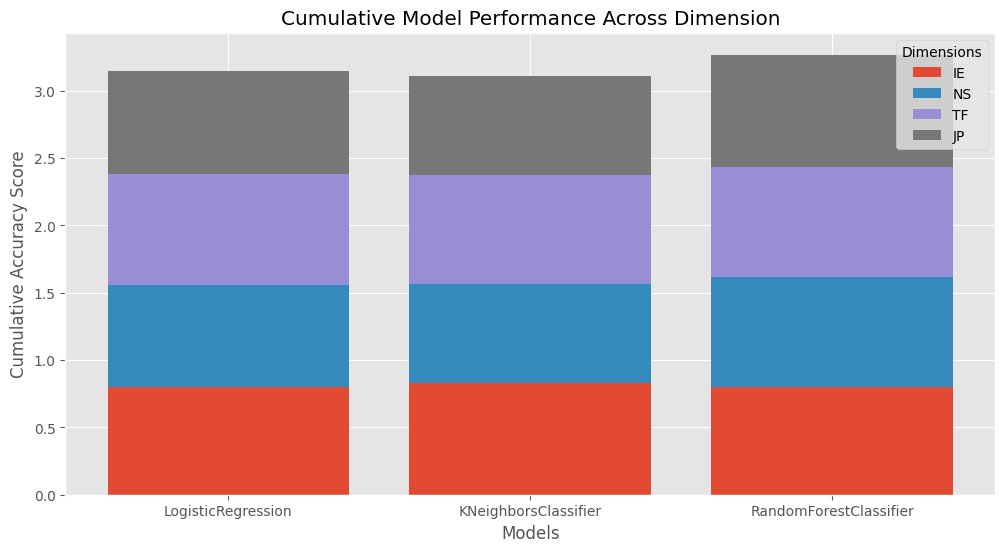

In [66]:
score_viz(best_models)

**Following the GridSearch across LogisticRegression, KNN classifier and RandomForest classifier, we infer that the RandomForest Classifier achieved the highest cumulative performance across all four MBTI dimensions. However, this strong performance may be due to overfitting on the training set.**

## Evaluation and Prediction

In [67]:
def convert_text_test(df, vectorizer, svd):
    
    #Vectorization
    text = df['preprocessed_text']
    text_vectorized = vectorizer.transform(text)
    
    #Dimensionality Reduction
    text_svd = svd.transform(text_vectorized)

    #Convert to df
    text_df = pd.DataFrame(text_svd,
                           columns = [f'svd_feature_{i}'
                                       for i in range(text_svd.shape[1])],
                            index = text.index)
    
    #Drop columns
    df = df.drop(columns = ['preprocessed_text'],
                 axis = 1)
    
    df = pd.concat([df,text_df], axis = 1)

    return df

In [68]:
def test_prep (X, vectorizer, svd , scaler):
    
    #Post length and Readability 
    X = word_counts(X)
    X = avg_sentence_length(X)
    X = perc_long_words(X)
    X['gfi_score'] = 0.4 * (X['avg_sentence_length'] + X["perc_longword"])
    
    #Named entity recognition
    def ner(text) :
            doc = nlp(text)
            entities = defaultdict(list)
            for ent in doc.ents : 
                entities[ent.label_].append(ent.text)
            return dict(entities)
    X['named_entities_recognition'] = X['posts'].apply(ner)
    
    for entity in distinct_entities:
        X[entity] = 0
    for idx, row in X.iterrows():
        entity_dict = row['named_entities_recognition']
        for entity in distinct_entities:
            if entity in entity_dict:
                X.at[idx, entity] = len(entity_dict[entity])
    

    #Sentiment Analysis 
    X["preprocessed_text"] = X["posts"].apply(preprocessing)
    X = sentiment_score(X)
    X['polarity'] = (X['Positive']-X['Negative'])/((X['Positive']+X['Negative'])*100)
    
    X = X.drop(columns = ['posts', 'named_entities_recognition', 
                         'Positive', 'Negative', 'Neutral', 
                         'perc_longword', 'avg_sentence_length', 'sentence_count'], 
              axis = 1)
    
    #Vectorization and Transformation 
    X = convert_text_test(X, vectorizer, svd)
    
    
    #Scaling
    X_test_scaled = scaler.transform(X)
    
    return X_test_scaled

In [69]:
#Split into X_test and y_test
X_test0 = test.drop(columns = ['type'], 
                  axis = 1)
y_test = test['type']

In [70]:
#Split y_test 
y_test_splitted = pd.DataFrame(y_test)
y_test_splitted = y_test_splitted.join(y_test_splitted.apply(lambda row : get_types(row),
                                                            axis = 1))

In [71]:
y_test_splitted.head()

,type,IE,NS,TF,JP
2802,INTP,1,1,1,0
2166,INTJ,1,1,1,1
1919,INTP,1,1,1,0
360,ENFP,0,1,0,0
1115,ENTJ,0,1,1,1


In [72]:
#Prepare X_test 
X_test_scaled = test_prep(X_test0, vectorizer, svd, scaler)

In [73]:
def test(X,y, best_models):
    
        fig, axes = plt.subplots(2,2,figsize = (20,20))
        axes = axes.ravel()
        results = {}
        
        dimensions = ['IE', 'NS', 'TF', 'JP']
        for idx, dim in enumerate(dimensions) : 
            if dim == 'IE' : model = best_models['IE']['LogisticRegression'][0]
            elif dim == 'NS' : model = best_models['NS']['RandomForestClassifier'][0]
            elif dim == 'TF' : model = best_models['TF']['LogisticRegression'][0]
            else : model = best_models['JP']['LogisticRegression'][0]
            
            y_pred = model.predict(X)
            y_prob = model.predict_proba(X)
            
            cm = confusion_matrix(y[dim], y_pred)
            accuracy = accuracy_score(y[dim], y_pred)
            
            results[dim] = {'Accuracy' : accuracy, 
                           'Prediction' : y_pred,
                           'Probabilities': y_prob, 
                           'Confusion_matrix' : cm}
            
            print(f"Accuracy for {dim} : {accuracy: .3f}")
            
            sns.heatmap(cm, fmt = 'd', cmap = 'Blues',
                        ax = axes[idx])
            axes[idx].set_title(f'CM for {dim}, Model : {model}', 
                                fontsize = 24)
            axes[idx].set_xlabel('Predicted', fontsize = 20)
            axes[idx].set_ylabel('True', fontsize = 20)
            axes[idx].set_xticklabels([dim[1], dim[0]], fontsize = 20)
            axes[idx].set_yticklabels([dim[1], dim[0]], fontsize = 20)
            
        plt.tight_layout()
        plt.show()
        
        return fig, results
                    
        
        

Accuracy for IE :  0.663
Accuracy for NS :  0.779
Accuracy for TF :  0.681
Accuracy for JP :  0.614


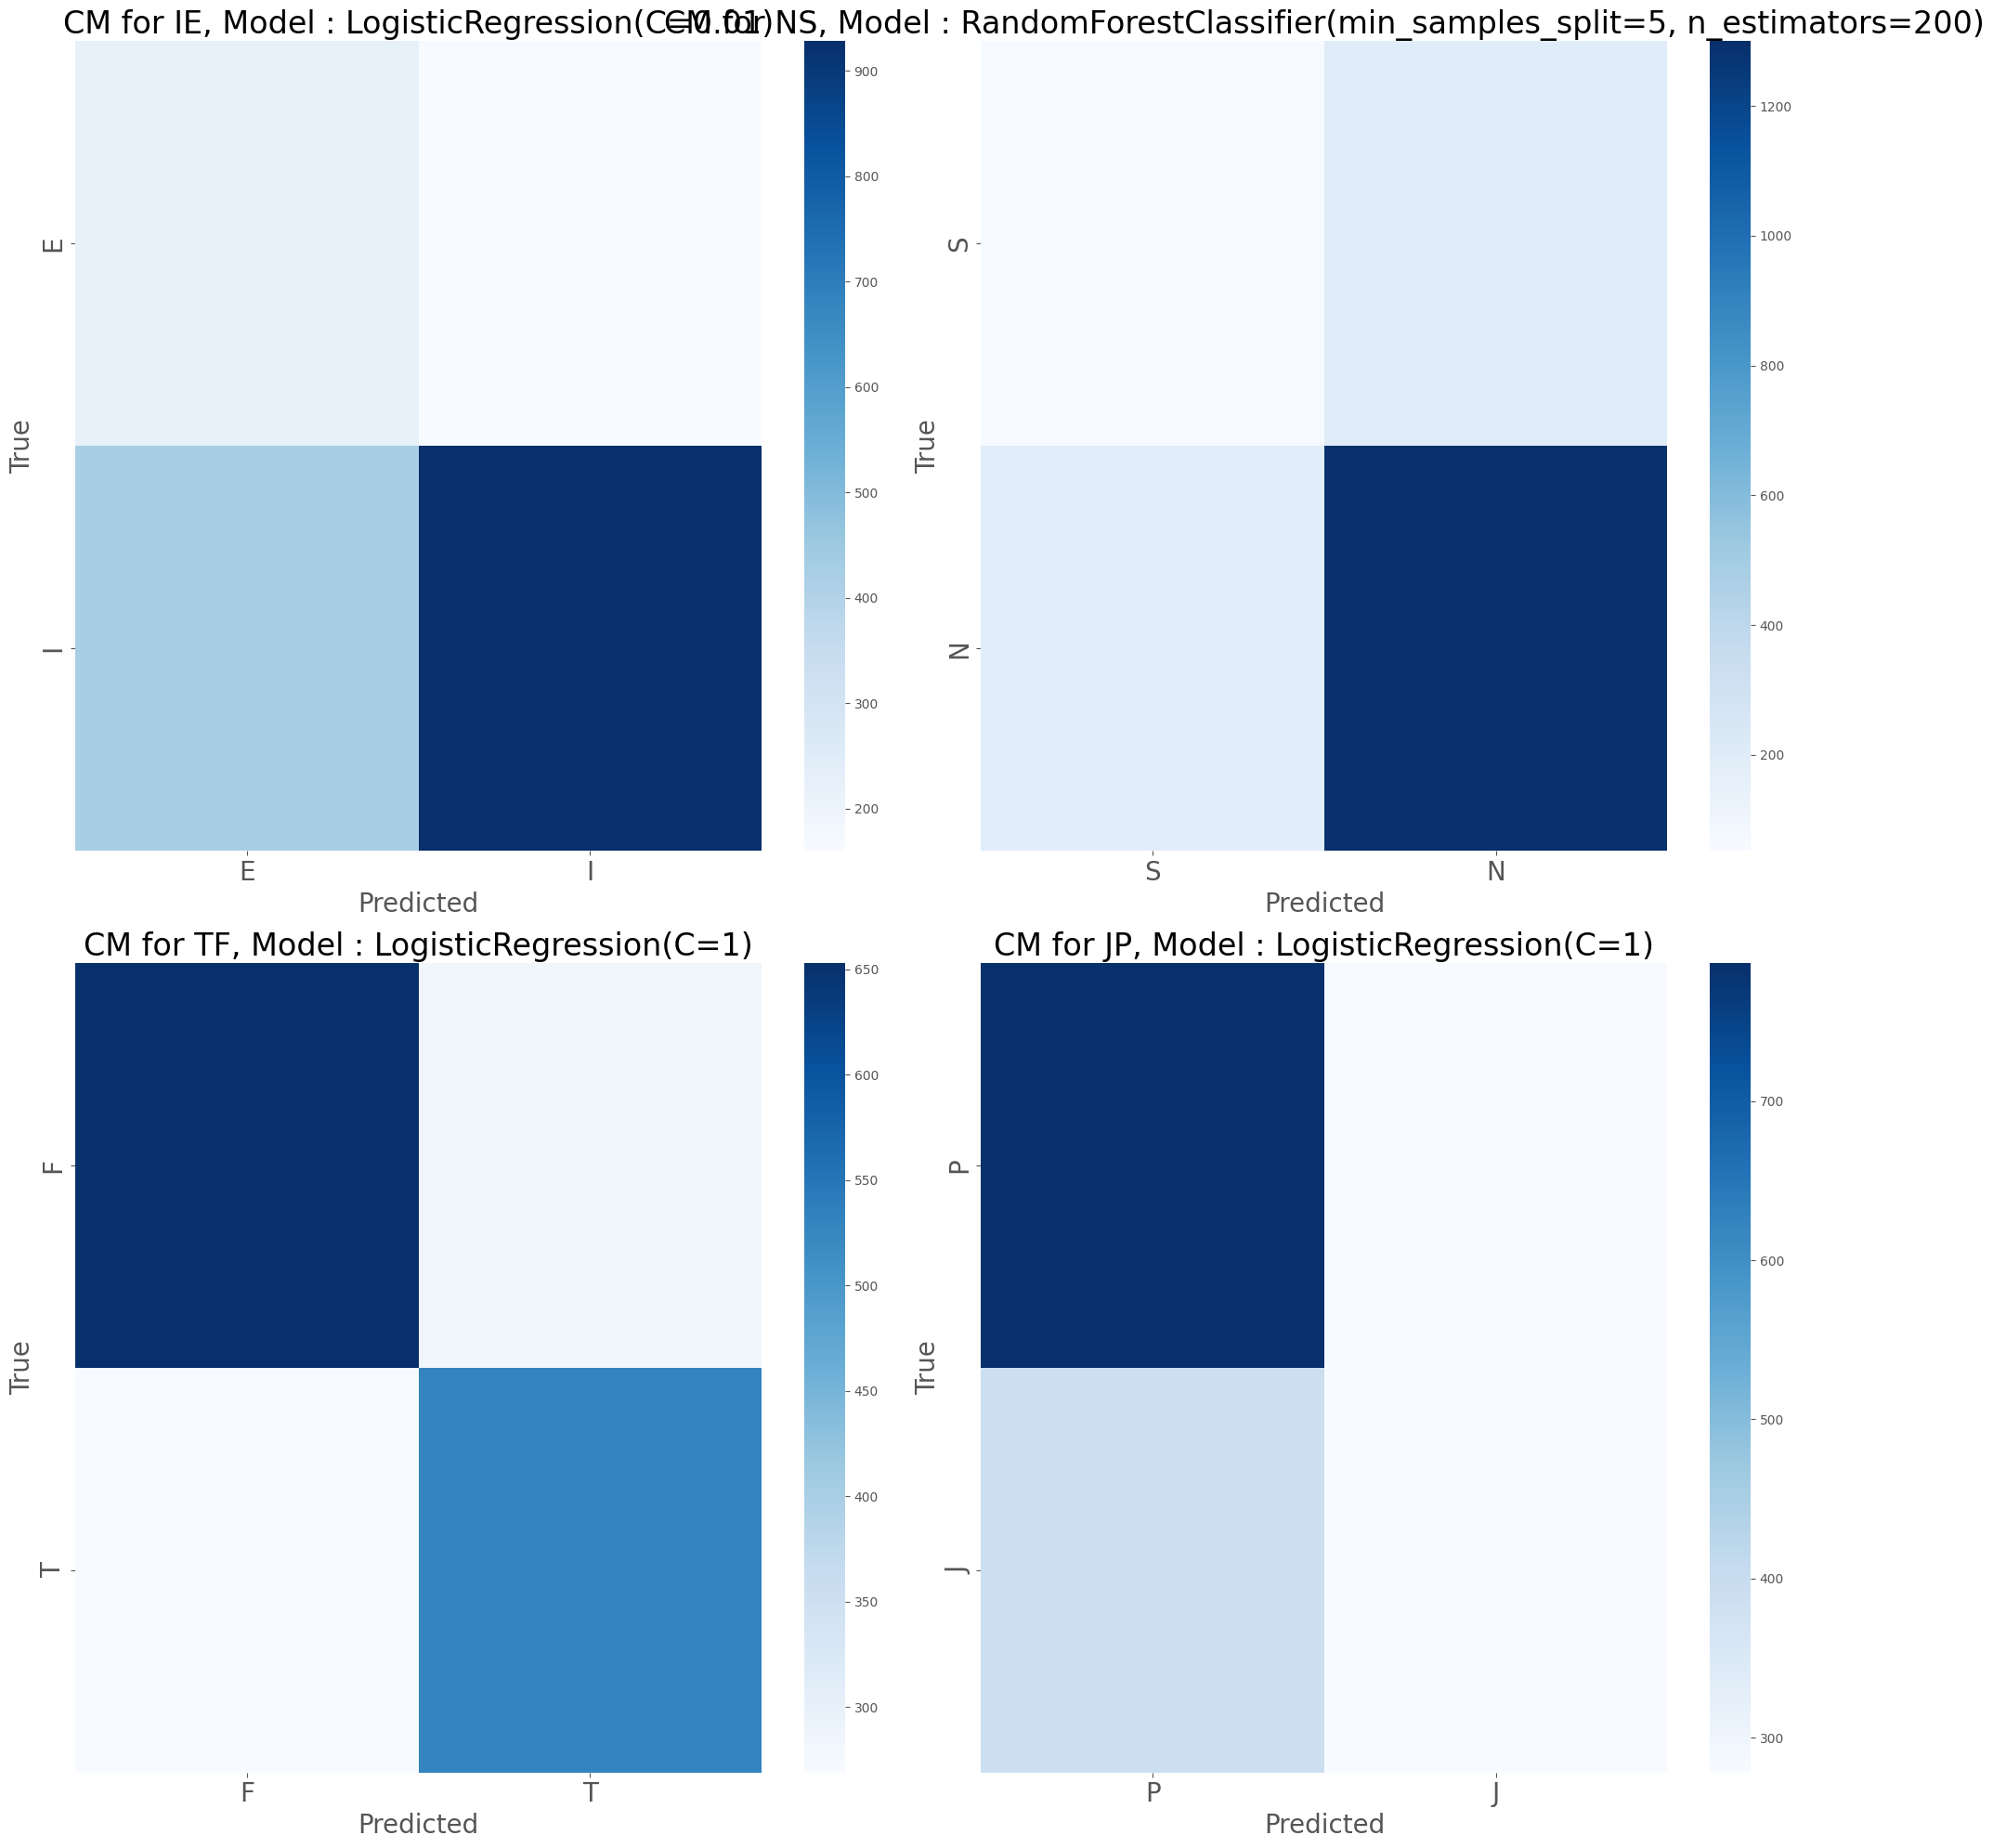

In [74]:
test_plot, test_results = test(X_test_scaled, y_test_splitted, best_models)

In [75]:
def class_report(y, results):
    for dim in dimensions: 
        print(classification_report(y[dim],
                             results[dim]['Prediction'],
                             target_names = [dim[1],dim[0]]))

In [76]:
class_report(y_test_splitted, test_results)

              precision    recall  f1-score   support

           E       0.34      0.58      0.43       382
           I       0.85      0.69      0.76      1353

    accuracy                           0.66      1735
   macro avg       0.60      0.63      0.60      1735
weighted avg       0.74      0.66      0.69      1735

              precision    recall  f1-score   support

           S       0.22      0.21      0.21       246
           N       0.87      0.87      0.87      1489

    accuracy                           0.78      1735
   macro avg       0.54      0.54      0.54      1735
weighted avg       0.78      0.78      0.78      1735

              precision    recall  f1-score   support

           F       0.71      0.70      0.70       937
           T       0.65      0.66      0.66       798

    accuracy                           0.68      1735
   macro avg       0.68      0.68      0.68      1735
weighted avg       0.68      0.68      0.68      1735

              preci

After multiple trials, considering the precision and recall metrics, Logistic Regression demonstrates the highest performance throughout the IE, TF, JP dimensions  while RandomForest classifier is the best on the remaining dimension NS.

The classification report indicates that the models tend to classify posts as belonging to overrepresented types and dimensions (I,N,F,P), this is due to the imbalanced characteristic of the test set.

Despite the high accuracy of the NS dimension (76%), the report reveals a significant gap between the precision and recall scores of the N and S dimensions : the model struggles to accurately identity S types, misclassifying them as N types, resulting in a low recall of 24%. The recall metric measures the percentage of actual member of a class that are correctly classified. In this case, only 24% of actual S types are classified as S. 


A similar issue arises in the IE dimension, where the model fails to identity E types, leading to a low precision of 33%. The precision metric measures the percentage of true positives among the prediction into a class. For instance, the percentage of predicted as E type that are actually E type is 33%.

In contrast, the model performs fairly well on the FT dimension, as the data is more balanced with 937 N types and 798 T types, allowing for more accurate classifications.

# Prediction on a new text data

First, we define a function that will prepare the raw text data into a suitable format for a prediction. Then the preprocessed text will be fed to the selected model, ready for MBTI type prediction. 

The selected models are 
- LogisticRegression for IE dimension
- RandomForest classifier for NS dimension 
- LogisticRegression for TF dimension
- LogisticRegression for JP dimension 

The model will output the class probabilities that indicate the likelihood of a text belonging to a class in each dimension. This will allow us to determine the MBTI personality type of the writer of the text's author. 

In [237]:
def prediction(text, vectorizer, svd, scaler, best_models):
        
        #Preprocessing 
        df = pd.DataFrame({'posts' : [text]})
        preprocessed_text = test_prep(df, vectorizer, svd, scaler)
        
        #Prediction
        predictions = []
        class_probabilities = []
        dimensions = ['IE', 'NS', 'TF', 'JP']
        
        for dim in (dimensions) :
            
                if dim == 'IE' :
                    model = best_models['IE']['LogisticRegression'][0]
                    pred = model.predict(preprocessed_text)
                    class_pred = 'I' if pred == 1 else 'E'
                    predictions.append(class_pred)
                    
                    class_prob = model.predict_proba(preprocessed_text)[0]
                    prob_I = class_prob[1]*100
                    prob_E = class_prob[0]*100
                    class_probabilities.append(f"I = {prob_I:.2f}%,E = {prob_E:.2f}%")
                    
                    
                elif dim == 'NS' : 
                    model = best_models['NS']['RandomForestClassifier'][0]
                    pred = model.predict(preprocessed_text)
                    class_pred = 'N' if pred == 1 else 'S'
                    predictions.append(class_pred)
                    
                    class_prob = model.predict_proba(preprocessed_text)[0]
                    prob_N = class_prob[1]*100
                    prob_S = class_prob[0]*100
                    class_probabilities.append(f"N = {prob_N:.2f}%, S = {prob_S:.2f}%")

                elif dim == 'TF' :
                    model = best_models['TF']['LogisticRegression'][0]
                    pred = model.predict(preprocessed_text)
                    class_pred = 'T' if pred == 1 else 'F'
                    predictions.append(class_pred)
                    
                    class_prob = model.predict_proba(preprocessed_text)[0]
                    prob_T = class_prob[1]*100
                    prob_F = class_prob[0]*100
                    class_probabilities.append(f"T = {prob_T:.2f}%, F = {prob_F:.2f}%")
                       
                else :
                    model = best_models['JP']['LogisticRegression'][0]
                    pred = model.predict(preprocessed_text)
                    class_pred = 'J' if pred == 1 else 'P'
                    predictions.append(class_pred)
                    
                    class_prob = model.predict_proba(preprocessed_text)[0]
                    prob_J = class_prob[1]*100
                    prob_P = class_prob[0]*100
                    class_probabilities.append(f"J = {prob_J:.2f}%, P = {prob_P:.2f}% ") 
                    
        #print("Type: ", predictions)
        #print("Probabilities: ", class_probabilities)
                                                
        return predictions, class_probabilities
        
        
        

In [238]:
def get_personality_prediction(vectorizer, svd, scaler, best_models) :
    text = input("Input your text: ")
    return prediction(text, vectorizer, svd, scaler, best_models)

In [245]:
get_personality_prediction(vectorizer, svd, scaler, best_models)

Input your text: Feet don't fail me now Take me to the finish line Oh, my heart it breaks every step that I take But I'm hoping that the gates, they'll tell me that you're mine Walking through the city streets Is it by mistake or design? I feel so alone on the Friday nights Can you make it feel like home if I tell you you're mine? It's like I told you, honey (louder) Don't make me sad, don't make me cry Sometimes love is not enough And the road gets tough, I don't know why Keep making me laugh Let's go get high The road is long, we carry on Try to have fun in the meantime Come and take a walk on the wild side Let me kiss you hard in the pouring rain You like your girls insane, so (louder) Choose your last words, this is the last time 'Cause you and I, we were born to die Lost but now I am found I can see that once I was blind I was so confused as a little child Tryna take what I could get Scared that I couldn't find All the answers, honey


(['E', 'N', 'F', 'P'],
 ['I = 15.75%,E = 84.25%',
  'N = 57.55%, S = 42.45%',
  'T = 0.77%, F = 99.23%',
  'J = 8.33%, P = 91.67% '])

In [249]:
get_personality_prediction(vectorizer, svd, scaler, best_models)

Input your text: Caesar, I never stood on ceremonies, Yet now they fright me. There is one within, Besides the things that we have heard and seen, Recounts most horrid sights seen by the watch. A lioness hath whelped in the streets; And graves have yawn'd, and yielded up their dead; Fierce fiery warriors fought upon the clouds, In ranks and squadrons and right form of war, Which drizzled blood upon the Capitol; The noise of battle hurtled in the air, Horses did neigh, and dying men did groan, And ghosts did shriek and squeal about the streets. O Caesar! these things are beyond all use, And I do fear them.


(['I', 'N', 'T', 'J'],
 ['I = 92.64%,E = 7.36%',
  'N = 58.40%, S = 41.60%',
  'T = 100.00%, F = 0.00%',
  'J = 97.12%, P = 2.88% '])